<h3 align="center"> Daksh Saksena, Assignment4 </h3>

In [1]:
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
df_true['class'] = 0; df_fake['class'] = 1 
df = pd.concat([df_fake, df_true]) 
X = TfidfVectorizer(stop_words='english', max_features=50).fit_transform(df['title']) 

# Cleaning

In [6]:
# Check for duplicates, this adds a new column to the dataset
df["is_duplicate"]= df.duplicated()

# Note that when using f-strings, the internal quote character must be different, such as 'is_duplicate' above
print(f"#total= {len(df)}")
print(f"#duplicated= {len(df[df['is_duplicate']==True])}")

#total= 44898
#duplicated= 209


In [7]:
# Print rows which have True in column 'is_duplicate'
df[df['is_duplicate']==True]

,title,text,subject,date,class,is_duplicate
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",1,True
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",1,True
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015",1,True
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017",0,True
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017",0,True
...,...,...,...,...,...,...
21228,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",0,True
21263,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",0,True
21290,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",0,True
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",0,True


In [8]:
# Drop the duplicate rows using index - best way to drop in pandas
index_to_drop = df[df['is_duplicate']==True].index
df.drop(index_to_drop, inplace=True)

# Remove the duplicate marker column
df.drop(columns='is_duplicate', inplace=True)
print(f'#total= {len(df)}')

#total= 44480


In [9]:
# Do we have NaN in our dataset?
df.isnull().any()

title      False
text       False
subject    False
date       False
class      False
dtype: bool

In [10]:
X = TfidfVectorizer(stop_words='english', max_features=50).fit_transform(df['title']) 

Now that the data cleaning is done, we can go into the appplication of classfieis

# Random Forest Classifier with two hyperparameters

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split




def rf_train_test(_X_tr, _X_ts, _y_tr, _y_ts):
    # Create a new random forest classifier, with working 4 parallel cores
    rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=None, n_jobs=4)
    # Train on training data
    rf.fit(_X_tr, _y_tr)
    # Test on training data
    y_pred = rf.predict(_X_ts)
    # Return more proper evaluation metric
    # return f1_score(_y_ts, y_pred, pos_label='recurrence-events', zero_division=0)
    # Return accuracy
    return accuracy_score(_y_ts, y_pred)

def rf_train_test2(_X_tr, _X_ts, _y_tr, _y_ts):
    # Create a new random forest classifier, with working 4 parallel cores
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=None, n_jobs=4)
    # Train on training data
    rf.fit(_X_tr, _y_tr)
    # Test on training data
    y_pred = rf.predict(_X_ts)
    # Return more proper evaluation metric
    # return f1_score(_y_ts, y_pred, pos_label='recurrence-events', zero_division=0)
    # Return accuracy
    return accuracy_score(_y_ts, y_pred)


y = df.loc[:, df.columns == 'class'].values.ravel()

# 80% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)
print ('The accuracy is around (for first hyper parameter with 50 estimators and depth 5) is',rf_train_test(X_train, X_test, y_train, y_test))
print ('The accuracy is around (for second hyper parameter setting with 100 estimators and depth 10) is ',rf_train_test2(X_train, X_test, y_train, y_test))

The accuracy is around (for first hyper parameter with 50 estimators and depth 5) is 0.7976618705035972
The accuracy is around (for second hyper parameter setting with 100 estimators and depth 10) is  0.8054181654676259


In [12]:
def eval_classifier(_X, _y, niter):
    accuracies = []
    kf = StratifiedKFold(n_splits=10,shuffle=False,random_state=None)
    for tr_ix, ts_ix in kf.split(_X, _y):
        accuracy = rf_train_test(_X[tr_ix], _X[ts_ix], _y[tr_ix], _y[ts_ix])
        accuracies += [accuracy]
    print( (f'Stratified 10-fold cross validation accuracy is '
            f'{np.mean(accuracies):.3f} {chr(177)}{np.std(accuracies):.4f} with {niter} total iterations')
         )

eval_classifier(X, y, 100)

Stratified 10-fold cross validation accuracy is 0.774 ±0.0705 with 100 total iterations


The Stratified 10-fold cross validation accuracy is the same as the accuracy given by the function rf_train_test function
# Decision Tree


In [13]:
#DecisionTree First Hyperparameter
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
dtf = DecisionTreeClassifier(max_depth=20, max_features=20 )
dtf = dtf.fit(X, y)
y_pred = dtf.predict(X_test)
y_pred_probab = dtf.predict_proba(X_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred))

Accuracy is 0.8083408273381295


In [14]:
#DecisionTree Second Hyperparameter
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
dtf = DecisionTreeClassifier(max_depth=10, max_features=8)
dtf = dtf.fit(X, y)
y_pred = dtf.predict(X_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred))


Accuracy is 0.7087455035971223


# Neural Network

In [15]:
#Neural Network First Hyperparameter
from sklearn.neural_network import MLPClassifier

neur = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1) 
neur.fit(X_train, y_train)
y_pred = neur.predict(X_test)

print ("Accuracy is", metrics.accuracy_score(y_test,y_pred))

Accuracy is 0.8123875899280576


In [16]:
#Neural Network Second Hyperparameter
from sklearn.neural_network import MLPClassifier

neur = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(4, 2), random_state=1) 
neur.fit(X_train, y_train)
y_pred = neur.predict(X_test)

print ("Accuracy is", metrics.accuracy_score(y_test,y_pred))

Accuracy is 0.809464928057554


Now, to make the ROC.

In [17]:
X = df.loc[:, df.columns != 'class'].values
X = TfidfVectorizer(stop_words='english', max_features=50).fit_transform(df['title']) 
y = df.loc[:, df.columns == 'class'].values.ravel()


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Display OP

def annot(opi, _x, _y):
    plt.annotate(f"OP{opi}", xy=(_x, _y), xytext=(.90*_x+.1, .80*_y), arrowprops=dict(facecolor='lightgray', shrink=1))

# Training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=1)

# Parameter to vary for Logistic Regression
C = (2e-1, 0.5, 0.8, 1, 2, 5, 1e1, 2e1, 1e2)

# Let's vary C and generate training/testing sessions to collect data for ROC
print(f'{"Test Acc":>8s} {"C":>11s} {"TPR":>6s} {"FPR":>6s}')
FPR, TPR = [], []
for c in C:
    pipe_lr = make_pipeline(StandardScaler(with_mean=False),
                            LogisticRegression(random_state=14,
                                               penalty='l1',
                                               solver='liblinear',
                                               class_weight='balanced',
                                               C=c,
                                               multi_class='auto',
                                               max_iter=10000))
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]  # Pd
    FPR += [fp/(fp+tn)]  # Pf

    print(f'{pipe_lr.score(X_test, y_test):8.3f} {c:11.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}')


Test Acc           C    TPR    FPR
   0.811     0.20000  0.696  0.062
   0.811     0.50000  0.696  0.062
   0.811     0.80000  0.696  0.062
   0.811     1.00000  0.696  0.063
   0.811     2.00000  0.696  0.063
   0.811     5.00000  0.696  0.063
   0.811    10.00000  0.696  0.063
   0.811    20.00000  0.696  0.063
   0.811   100.00000  0.696  0.063


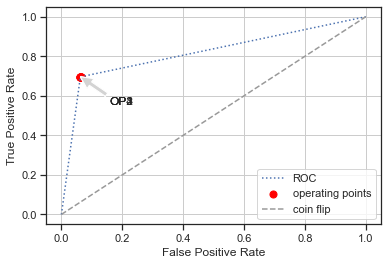

In [19]:
# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
annot(1, fpr[1], tpr[1])
annot(2, fpr[4], tpr[4])
annot(3, fpr[8], tpr[8])
annot(4, fpr[9], tpr[9])


# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

This showed the end of the first question, overall it was a relatively challenging exercise, and the end graph was pretty satisfactory. Now, I can safely answer the remaining questions.
# Question 2
In an ROC plot, i expect to see the Pd-pf interation towards the top left corner, indicating that it is a god mole with good performance. The middle dotted line shows a coin flip, which always has a 50-50 probability. If the Pd-pf is below this, then it means that random guessing is much better than the devised ML model, indicating poor peformance. 

With regards to my particular ROC, I feel it is a decent model, however ideally it should be a bit more towards the top left.


# Question 3


The most accurate classifier for me is the decision tree classifier with the hyper parameters,(max_depth=20, max_features=20).The best classifier and hyper-parameter configuration would maximize the area under the ROC curve (AUC). Other performance metrics, such as precision, recall, and accuracy, must be considered. The best classifier and hyper-parameter configuration would be one that balances all of these metrics for the best overall performance. In my case, this would be the most accurate, hence that is why I would choose it!

In [20]:
X = df.loc[:, df.columns != 'class'].values
X = TfidfVectorizer(stop_words='english', max_features=50).fit_transform(df['text'])
y = df.loc[:, df.columns == 'class'].values.ravel()

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer 
X1 = TfidfVectorizer(stop_words='english', max_features=50)
mct = make_column_transformer((X1,'title'),(X1,'text'))

In [22]:
X2 = mct.fit_transform(df)

# Question 4

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split


# We will reuse the classifier function below
def rf_train_test(_X_tr, _X_ts, _y_tr, _y_ts):
    # Create a new random forest classifier, with working 4 parallel cores
    rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=None, n_jobs=4)
    # Train on training data
    rf.fit(_X_tr, _y_tr)
    # Test on training data
    y_pred = rf.predict(_X_ts)
    # Return more proper evaluation metric
    # return f1_score(_y_ts, y_pred, pos_label='recurrence-events', zero_division=0)
    # Return accuracy
    return accuracy_score(_y_ts, y_pred)

def rf_train_test2(_X_tr, _X_ts, _y_tr, _y_ts):
    # Create a new random forest classifier, with working 4 parallel cores
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=None, n_jobs=4)
    # Train on training data
    rf.fit(_X_tr, _y_tr)
    # Test on training data
    y_pred = rf.predict(_X_ts)
    # Return more proper evaluation metric
    # return f1_score(_y_ts, y_pred, pos_label='recurrence-events', zero_division=0)
    # Return accuracy
    return accuracy_score(_y_ts, y_pred)


y = df.loc[:, df.columns == 'class'].values.ravel()

# 80% split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.20, random_state=None)
print ('The accuracy for X2 is around (for first hyper parameter with 50 estimators and depth 5) is',rf_train_test(X_train, X_test, y_train, y_test))
print ('The accuracy for X2 is around (for second hyper parameter setting with 100 estimators and depth 10) is ',rf_train_test2(X_train, X_test, y_train, y_test))

The accuracy for X2 is around (for first hyper parameter with 50 estimators and depth 5) is 0.9944919064748201
The accuracy for X2 is around (for second hyper parameter setting with 100 estimators and depth 10) is  0.9952787769784173


The accuracy is much more for this than the previous one because the sample size is much higher. There are more datapoints to choose from since the text column had more data than the title column anyway. Additionally, the text is also more descriptive than simply the title, and gives more insight.Combining them would help the classifier with more data, and as a result, the curse of dimensionality would not be an issue. 